#Notebook com Dataset da qualidade do vinho





In [4]:
# Import para não exibir warnings

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Carregando o Dataset



Dataset escolhido foi um dataset que define a qualidade do vinho baseada na sua composição. É dada uma nota a qualidade do vinho e essa nota será usada para classificar o vinho como ruim (1-3), mediano (4-5), bom(6-7) ou muito bom(8).



O dataset foi retirado originalmente do Kaggle no seguinte link: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


O dataset trabalha com os seguintes dados:

- fixed acidity = acidez fixa do vinho
- volatile acidity = acidez volátil do vinho
- citric acid = ácido cítrico
- residual sugar = açúcar residual
- chlorides = clorídios
- free sulfur dioxide = dióxido de enxofre livre
- total sulfur dioxide = total de dióxido de enxofre
- density = densidade do vinho
- ph = fator pH contido no vinho
- sulphates = sulfatos contidos no vinho
- achohol = alcool contido no vinho
- quality - qualidade do vinho
- id = id de cadastro no dataset





In [6]:
#carregando a url com o dataset

url = "https://raw.githubusercontent.com/MSennam/MVP_Sistemas_Inteligentes/main/WineQT.csv"

dataset = pd.read_csv(url, delimiter=',')


dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Separação em conjunto de treinos e conjunto de teste com holdout

In [8]:
test_size = 0.20 # definindo tamanho do conjunto de teste
seed = 5 # definindo semente aleatória

array = dataset.values
X = array[:,0:11]
Y = array[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, shuffle =True, random_state=seed, stratify=Y) #holdout com estratificação

scoring = 'accuracy'
numero_particoes = 10
KFold = StratifiedKFold(n_splits=numero_particoes, shuffle=True, random_state=seed) # definindo a validação cruzada


# Definindo modelagem e a inferencia
##Criação e avaliação dos modelos: linha base

LR: 0.589728 (0.040305)
KNN: 0.511885 (0.038179)
CART: 0.520915 (0.050337)
NB: 0.553571 (0.036087)
SVM: 0.499976 (0.023830)
Baggin: 0.642260 (0.036052)
Voting: 0.565707 (0.037253)
RF: 0.651063 (0.057330)
ET: 0.656498 (0.052046)
AB: 0.537195 (0.057403)
GB: 0.606175 (0.037150)


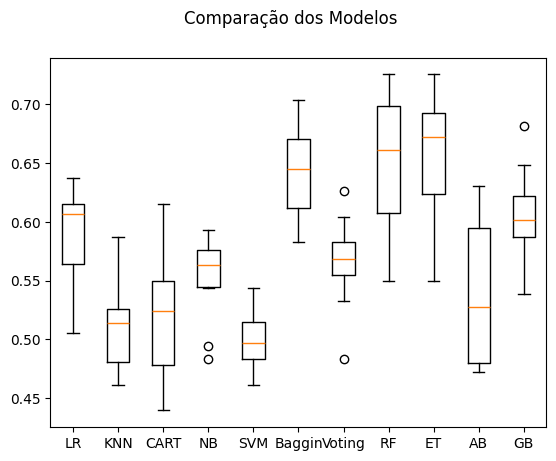

In [9]:
np.random.seed(5) #seed definida após testes com possibilidades de maior acurácia

#lista de armazenamento de modelos e adicionando-os na lista
modelos = []
modelos.append(('LR', LogisticRegression(max_iter= 500)))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

#Bagging Classifier e Voting Classifier
base = DecisionTreeClassifier()
numero_arvores = 100
max_features = 3

bases = []
modelo1 = LogisticRegression(max_iter= 300)
bases.append(('logistic', modelo1))
modelo2 = DecisionTreeClassifier()
bases.append(('cart', modelo2))
modelo3 = SVC()
bases.append(('svm', modelo3))

modelos.append(('Baggin', BaggingClassifier(estimator=base, n_estimators=numero_arvores)))
modelos.append(('Voting', VotingClassifier(bases)))
modelos.append(('RF', RandomForestClassifier(n_estimators=numero_arvores, max_features=max_features)))
modelos.append(('ET', ExtraTreesClassifier(n_estimators=numero_arvores, max_features=max_features)))
modelos.append(('AB', AdaBoostClassifier(n_estimators=numero_arvores)))
modelos.append(('GB', GradientBoostingClassifier(n_estimators=numero_arvores)))

# Armazendo os resultados
resultados = []
nomes = []

#treinamento dos modelos
for nome, modelo in modelos:
    cv_resultados = cross_val_score(modelo, X_train, Y_train, cv=KFold, scoring=scoring)
    resultados.append(cv_resultados)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_resultados.mean(), cv_resultados.std())
    print(msg)

#Comparação de modelos via boxplot

fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()










#Padronização e normalização dos modelos

LR-original: 0.595198 (0.032993)
KNN-original: 0.511885 (0.038179)
CART-original: 0.520915 (0.050337)
NB-original: 0.553571 (0.036087)
SVM-original: 0.499976 (0.023830)
Bag-original: 0.642260 (0.036052)
Vote-original: 0.565707 (0.037253)
RF-original: 0.651063 (0.057330)
ET-original: 0.656498 (0.052046)
AB-original: 0.537195 (0.057403)
GB-original: 0.606175 (0.037150)
LR-padronizado: 0.599582 (0.047794)
KNN-padronizado: 0.551493 (0.042257)
CART-padronizado: 0.536216 (0.040314)
NB-padronizado: 0.545951 (0.036075)
SVM-padronizado: 0.620354 (0.039124)
Bag-padronizado: 0.646572 (0.038618)
Vote-padronizado: 0.611610 (0.040260)
RF-padronizado: 0.645581 (0.044609)
ET-padronizado: 0.657645 (0.054925)
AB-padronizado: 0.537195 (0.057403)
GB-padronizado: 0.604001 (0.037249)
LR-normalizado: 0.591878 (0.035546)
KNN-normalizado: 0.551433 (0.055795)
CART-normalizado: 0.530793 (0.064752)
NB-normalizado: 0.545951 (0.036075)
SVM-normalizado: 0.600669 (0.037480)
Bag-normalizado: 0.642200 (0.036589)
Vote-n

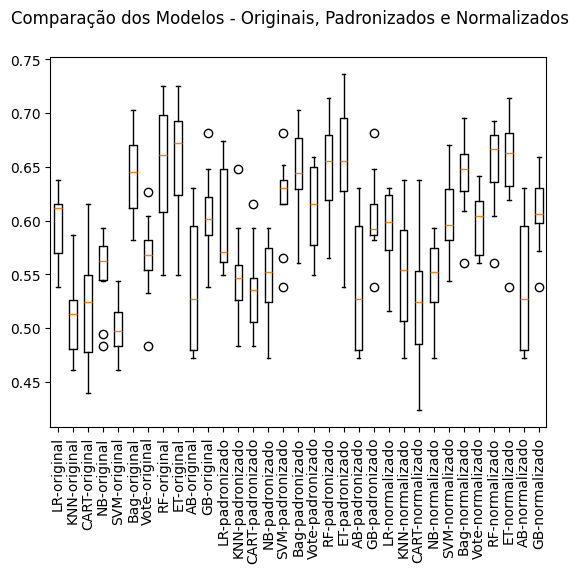

In [10]:
np.random.seed(5)


#armazenamentos das pipelines, resultados e nomes para todas as possibilidades do dataset

pipelines=[]
resultados = []
nomes = []

reg_log = ('LR', LogisticRegression(max_iter=300))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=numero_arvores))
voting = ('Vote', VotingClassifier(bases))
random_forest = ('RF', RandomForestClassifier(n_estimators=numero_arvores, max_features=max_features))
extra_tree = ('ET', ExtraTreesClassifier(n_estimators=numero_arvores, max_features=max_features))
ada_boost = ('AB', AdaBoostClassifier(n_estimators=numero_arvores))
gradient_boost = ('GB', GradientBoostingClassifier(n_estimators=numero_arvores))

#usando os scalers
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#Montando os pipelines
#Original
pipelines.append(('LR-original',Pipeline([reg_log])))
pipelines.append(('KNN-original',Pipeline([knn])))
pipelines.append(('CART-original',Pipeline([cart])))
pipelines.append(('NB-original',Pipeline([naive_bayes])))
pipelines.append(('SVM-original',Pipeline([svm])))
pipelines.append(('Bag-original',Pipeline([bagging])))
pipelines.append(('Vote-original',Pipeline([voting])))
pipelines.append(('RF-original',Pipeline([random_forest])))
pipelines.append(('ET-original',Pipeline([extra_tree])))
pipelines.append(('AB-original',Pipeline([ada_boost])))
pipelines.append(('GB-original',Pipeline([gradient_boost])))

#Padronizado
pipelines.append(('LR-padronizado',Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padronizado',Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padronizado',Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padronizado',Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padronizado',Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padronizado',Pipeline([standard_scaler, bagging])))
pipelines.append(('Vote-padronizado',Pipeline([standard_scaler, voting])))
pipelines.append(('RF-padronizado',Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padronizado',Pipeline([standard_scaler, extra_tree])))
pipelines.append(('AB-padronizado',Pipeline([standard_scaler, ada_boost])))
pipelines.append(('GB-padronizado',Pipeline([standard_scaler, gradient_boost])))

#Normalizado

pipelines.append(('LR-normalizado',Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-normalizado',Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-normalizado',Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-normalizado',Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-normalizado',Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-normalizado',Pipeline([min_max_scaler, bagging])))
pipelines.append(('Vote-normalizado',Pipeline([min_max_scaler, voting])))
pipelines.append(('RF-normalizado',Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-normalizado',Pipeline([min_max_scaler, extra_tree])))
pipelines.append(('AB-normalizado',Pipeline([min_max_scaler, ada_boost])))
pipelines.append(('GB-normalizado',Pipeline([min_max_scaler, gradient_boost])))

for nome, modelo in pipelines:
    cv_resultados = cross_val_score(modelo, X_train, Y_train, cv=KFold, scoring=scoring)
    resultados.append(cv_resultados)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_resultados.mean(), cv_resultados.std())
    print(msg)

#Desenhando o boxplot novamente com os novos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos - Originais, Padronizados e Normalizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes, rotation=90)
plt.show()




#Otimizando os hiperparâmetros. Para escolher o melhor desempenho.

Dentro dos modelos utilizados até o momento o melhor foi Extra Trees Classifier padronizado. Na busca de uma melhor acurácia, vamos otimizar os hiperparâmetros.



In [30]:
np.random.seed(5)

modelos = []

#criação dos modelos
modelos.append(('LR', LogisticRegression(max_iter=300)))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

#Parametros do bagging classifier
base = DecisionTreeClassifier()
numero_arvores = 100
max_features = 3

#modelos do Votingclassifer
bases = []
modelo1 = LogisticRegression(max_iter= 300)
bases.append(('logistic', modelo1))
modelo2 = DecisionTreeClassifier()
bases.append(('cart', modelo2))
modelo3 = SVC()
bases.append(('svm', modelo3))

#ensembles e lista de modelos

modelos.append(('Baggin', BaggingClassifier(estimator=base, n_estimators=numero_arvores)))
modelos.append(('Voting', VotingClassifier(bases)))
modelos.append(('RF', RandomForestClassifier(n_estimators=numero_arvores, max_features=max_features)))
modelos.append(('ET', ExtraTreesClassifier(n_estimators=numero_arvores, max_features=max_features)))
modelos.append(('AB', AdaBoostClassifier(n_estimators=numero_arvores)))
modelos.append(('GB', GradientBoostingClassifier(n_estimators=numero_arvores)))

# Padronização e normalização no Pipeline

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []

# Criação dos Pipelines para cada modelo
for nome, modelo in modelos:
    pipelines.append((nome + '-original', Pipeline(steps=[(nome, modelo)])))
    pipelines.append((nome + '-padronizado', Pipeline(steps=[standard_scaler, (nome, modelo)])))
    pipelines.append((nome + '-normalizado', Pipeline(steps=[min_max_scaler, (nome, modelo)])))

# Parametros do Grid Search

parametros_gridsearch = {
    'LR': {'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'LR__solver': ['liblinear', 'saga']},
    'KNN': {'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21], 'KNN__metric': ['euclidean', 'manhattan', 'minkowski']},
    'CART': {'CART__max_depth': [None, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'CART__min_samples_split': [2, 5, 10], 'CART__min_samples_leaf': [1,2,4]},
    'NB': {'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] },
    'SVM': {'SVM__C': [0.01, 0.1, 1, 10, 100, 1000], 'SVM__gamma': [1, 0.1, 0.01, 0.001], 'SVM__kernel': ['rbf', 'linear']},
    'RF': {'RF__n_estimators': [10, 50, 100, 200, 300], 'RF__max_features': ['auto','sqrt', 'log2'], 'RF__max_depth': [None, 10, 20, 30], 'RF__min_samples_split':[2, 5, 10], 'RF__min_samples_leaf': [1,2,4]},
    'ET': {'ET__n_estimators': [10, 50, 100, 200, 300], 'ET__max_features': ['auto','sqrt', 'log2'], 'ET__max_depth': [None, 10, 20, 30], 'ET__min_samples_split':[2, 5, 10], 'ET__min_samples_leaf': [1,2,4]},
    'Ada': {'Ada__n_estimators': [10, 50, 100, 200, 300], 'Ada__learning_rate': [0.01, 0.1, 1, 10]},
    'GB': {'GB__n_estimators': [10, 50, 100, 200, 300], 'GB__learning_rate': [0.01, 0.1, 0.2, 0.3] , 'GB__max_depth': [3, 5, 7, 9, 11]},
    'Voting': {}

}

# Validação e scoring

scoring = 'accuracy'
KFold = 5

# Execução do Gridsearch nas pipelines

for nome, pipeline in pipelines:
    tipo_modelo = nome.split('-')[0]
    if tipo_modelo in parametros_gridsearch:
        param_grid = parametros_gridsearch[tipo_modelo]
    else:
        param_grid = {}

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=KFold, scoring=scoring)
    grid.fit(X_train, Y_train)

    print("Modelo: %s - Melhor: %f usando %s" % (nome, grid.best_score_, grid.best_params_))  #Vai demorar 7h para executar


Modelo: LR-original - Melhor: 0.585324 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padronizado - Melhor: 0.596283 usando {'LR__C': 1, 'LR__solver': 'saga'}
Modelo: LR-normalizado - Melhor: 0.597376 usando {'LR__C': 10, 'LR__solver': 'saga'}
Modelo: KNN-original - Melhor: 0.537201 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: KNN-padronizado - Melhor: 0.589690 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Modelo: KNN-normalizado - Melhor: 0.583156 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: CART-original - Melhor: 0.568925 usando {'CART__max_depth': 35, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padronizado - Melhor: 0.575488 usando {'CART__max_depth': 35, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-normalizado - Melhor: 0.573290 usando {'CART__max_depth': 45, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-original - Melhor: 0.555822 

In [ ]:
#Resultados das 7 horas de código

#Modelo: LR-original - Melhor: 0.585324 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
#Modelo: LR-padronizado - Melhor: 0.596283 usando {'LR__C': 1, 'LR__solver': 'saga'}
#Modelo: LR-normalizado - Melhor: 0.597376 usando {'LR__C': 10, 'LR__solver': 'saga'}
#Modelo: KNN-original - Melhor: 0.537201 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
#Modelo: KNN-padronizado - Melhor: 0.589690 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
#Modelo: KNN-normalizado - Melhor: 0.583156 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
#Modelo: CART-original - Melhor: 0.568925 usando {'CART__max_depth': 35, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: CART-padronizado - Melhor: 0.575488 usando {'CART__max_depth': 35, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: CART-normalizado - Melhor: 0.573290 usando {'CART__max_depth': 45, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
#Modelo: NB-original - Melhor: 0.555822 usando {'NB__var_smoothing': 1e-05}
#Modelo: NB-padronizado - Melhor: 0.533946 usando {'NB__var_smoothing': 1e-09}
#Modelo: NB-normalizado - Melhor: 0.533946 usando {'NB__var_smoothing': 1e-09}
#Modelo: SVM-original - Melhor: 0.587486 usando {'SVM__C': 1000, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
#Modelo: SVM-padronizado - Melhor: 0.613775 usando {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
#Modelo: SVM-normalizado - Melhor: 0.605044 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
#Modelo: Baggin-original - Melhor: 0.626926 usando {}
#Modelo: Baggin-padronizado - Melhor: 0.633495 usando {}
#Modelo: Baggin-normalizado - Melhor: 0.632397 usando {}
#Modelo: Voting-original - Melhor: 0.576605 usando {}
#Modelo: Voting-padronizado - Melhor: 0.613769 usando {}
#Modelo: Voting-normalizado - Melhor: 0.595184 usando {}
#Modelo: RF-original - Melhor: 0.658686 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
#Modelo: RF-padronizado - Melhor: 0.663052 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
#Modelo: RF-normalizado - Melhor: 0.659749 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}
#Modelo: ET-original - Melhor: 0.667417 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 2, 'ET__n_estimators': 300}
#Modelo: ET-padronizado - Melhor: 0.667405 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 300}
#Modelo: ET-normalizado - Melhor: 0.666324 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
#Modelo: AB-original - Melhor: 0.532763 usando {}
#Modelo: AB-padronizado - Melhor: 0.532763 usando {}
#Modelo: AB-normalizado - Melhor: 0.533856 usando {}
#Modelo: GB-original - Melhor: 0.628025 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 300}
#Modelo: GB-padronizado - Melhor: 0.629094 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 9, 'GB__n_estimators': 100}
#Modelo: GB-normalizado - Melhor: 0.628049 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 100}

Dentro dos testes, o modelo com maior acurácia, foi o Extra Trees padronizado, com um valor de 0.667405. Logo abaixo, muito próximo, temos o Random Forest.

Para a aplicação, utilizaremos o Extra Trees, estou optando utilizá-la devido a porcentagem não muito alta encontrada pelos modelos.

#Finalizando o modelo escolhido

In [11]:
np.random.seed(5)

#preparando o modelo novamente, agora aplicando a padronização.
#Modelo: ET-padronizado - Melhor: 0.667405 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 300}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
modelo = ExtraTreesClassifier(max_depth=30, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=300)

modelo.fit(rescaledX, Y_train)

#estimativa de acurácia no conjunto de teste
rescaledValidationX = scaler.transform(X_test)
predictions = modelo.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))

0.7030567685589519


Agora com Pipeline otimizado

In [12]:
np.random.seed(5)

modelo = ExtraTreesClassifier(max_depth=30, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=300)

pipeline = Pipeline(steps=[('StandardScaler', StandardScaler()), ('ET', modelo)])

pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7030567685589519


#Salvando os arquivos

In [14]:
from os import pipe
#Modelo
model_filename = 'et_wine_classifier.pkl'
with open("../modelos/"+model_filename, 'wb') as file:
    pickle.dump(modelo, file)

#Scaler
scaler_filename = 'standard_scaler.pkl'
with open("../scalers"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

#Pipeline

pipeline_filename = 'et_wine_classifier_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

#X_test e o Y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:11])
Y_test_df = pd.DataFrame(Y_test, columns=['quality'])
X_test_df.to_csv('X_test.csv', index=False)
Y_test_df.to_csv('Y_test.csv', index=False)

#Simulando a aplicação do modelo em dados novos

In [17]:
#Modelo usando todo o dataset, com aplicação da padronização
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
modelo.fit(rescaledX, Y)


ExtraTreesClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                     n_estimators=300)

In [24]:
#Novos dados sem saber a qualidade do vinho

data= {'fix_acid':    [4.5, 7.0, 6.2],
      'vol_acid':     [0.85, 0.6, 0.45],
      'cit_acid':     [0.1, 0.25, 0.35],
      'res_sugar':    [2.0, 2.2, 1.8],
      'chlorides':    [0.09, 0.08, 0.05],
      'free_sulf':    [5.0, 15.0, 25.0],
      'total_sulf':   [20.0, 60.0, 90.0],
      'density':      [0.9985, 0.9968, 0.9946],
      'ph':           [3.2, 3.3, 3.4],
      'sulphates':    [0.4, 0.6, 0.75],
      'alcohol':      [7.5, 10.0, 12.5]
       }

atributos = ['fix_acid', 'vol_acid', 'cit_acid', 'res_sugar', 'chlorides', 'free_sulf', 'total_sulf', 'density', 'ph', 'sulphates', 'alcohol']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

#Padroniza dados usando o scaler usado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-2.18172936  1.77473272 -0.8563791  -0.39263833  0.06492241 -1.03606133
  -0.79085897  0.91963723 -0.70892755 -1.51304307 -2.71984033]
 [-0.75056579  0.38239855 -0.0934078  -0.24507216 -0.14673278 -0.06007081
   0.4298521   0.03616459 -0.07033965 -0.33881152 -0.4087107 ]
 [-1.20853813 -0.45300195  0.41523973 -0.5402045  -0.78169835  0.91591972
   1.3453854  -1.10715295  0.56824825  0.54186214  1.90241892]]


In [25]:
#Predizendo a qualidade do vinho

saidas = modelo.predict(rescaledEntradaX)
print(saidas)

[5. 5. 6.]


#Conclusão

Com esse modelo buscamos criar um modelo de machine learning qualifique os vinhos numa gradação de um a oito.

Após testes, foi descoberto que o modelo com maior acurácia é o Extra Trees Classifier, que alcança uma acurácia de aproximadamente 70% após a aplicação da padronização nos dados (Standard Scaler).

Acredito que essa acurácia seja um efeito do próprio dataset, que possui entradas um poucos limitadas, havendo por exemplo, poucas instâncias de vinhos com gradação 8. Como maior parte das entradas é de um valor próximo a qualidade média ou boa, acredito que o modelo tenha um tendência a nivelar os dados para essa gradação.

O modelo é exportado com pickle, buscando uma integração com uma api na qual o usuário colocará as informações do vinho e então ao final, ele informará se o vinho é ruim, mediano, bom ou muito bom.  

